In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone --filter=blob:none --sparse https://github.com/editor-kagaku/Binary.git
%cd Binary
!git sparse-checkout set chapter7
%cd chapter7

In [ ]:
!chmod u+x prob7-1
!./prob7-1

Input password.


In [ ]:
!./prob7-1 aaaa

Authentication failed.


In [ ]:
!git clone https://github.com/radareorg/radare2
!radare2/sys/install.sh
!pip install r2pipe

/root
fatal: destination path 'radare2' already exists and is not an empty directory.
/root/radare2
[WW] Do not run this script as root!
From https://github.com/radareorg/radare2
 * branch                  master     -> FETCH_HEAD
Already up to date.
gmake: Entering directory '/root/radare2/shlr'
[ "`cd capstone && git rev-parse HEAD`" = "e90ef3928fc329ebe3214a7814aa34318b23f490" ]
gmake: Leaving directory '/root/radare2/shlr'
ARGS=
/bin/bash ./sys/build.sh
/root/radare2
Building on Linux : computing number of allowed parallel jobs.
Maximum allowed RAM memory per job is 150000 kB.
Number of CPUs is 2 and current free RAM allows us to run 80 jobs in parallel.
So, the build will run on 2 job(s).
/root/radare2
./configure --with-rpath --prefix=/usr/local
configure-plugins: Copying dist/plugins-cfg/plugins.def.cfg
configure-plugins: Loading ./plugins.cfg ..
configure-plugins: Generating libr/config.h
configure-plugins: Generating libr/asm/d/config.inc
configure-plugins: Generating libr/con

In [ ]:
import r2pipe

r2 = r2pipe.open("prob7-1")
r2.cmd('aaa')
functions = r2.cmdj('aflj')
print([x['name'] for x in functions])

r2.quit()

['sym.imp.strncpy', 'sym.imp.puts', 'sym.imp.strcmp', 'entry0', 'sym.deregister_tm_clones', 'sym.register_tm_clones', 'sym.__do_global_dtors_aux', 'sym.frame_dummy', 'sym._fini', 'sym._dl_relocate_static_pie', 'main', 'sym._init']


In [ ]:
import r2pipe

r2 = r2pipe.open("prob7-1")
r2.cmd('aaa')
functions = r2.cmdj('aflj')
main_function = next((f for f in functions if f['name'] == 'main'))

if main_function:
    main_address = main_function['offset']
    main_size = main_function['size']
    r2.cmd('e asm.bytes=false')
    r2.cmd('e asm.cmt.right=false')
    disassembly = r2.cmd(f'pD {main_size} @{main_address}')
    print(disassembly)
    r2.cmd(f'agfw a {main_size} @{main_address}')

else:
    print("main function not found")

r2.quit()

            ; DATA XREF from entry0 @ 0x4010a8(r)
┌ 204: int main (signed int64_t argc, char **argv);
│           ; arg signed int64_t argc @ rdi
│           ; arg char **argv @ rsi
│           ; var char *dest @ rbp-0x100
│           ; var int64_t var_104h @ rbp-0x104
│           ; var int64_t var_108h @ rbp-0x108
│           ; var int64_t var_10ch @ rbp-0x10c
│           ; var char *s2 @ rbp-0x110
│           ; var signed int64_t var_114h @ rbp-0x114
│           ; var char **src @ rbp-0x120
│           0x00401176      endbr64
│           0x0040117a      push rbp
│           0x0040117b      mov rbp, rsp
│           0x0040117e      sub rsp, 0x120
│           ; argc
│           0x00401185      mov dword [var_114h], edi
│           ; argv
│           0x0040118b      mov qword [src], rsi
│           ; '34sy'
│           0x00401192      mov dword [s2], 0x79733433
│           ; 'Pa33'
│           0x0040119c      mov dword [var_10ch], 0x33336150
│           ; 'w0rd'
│           0x004011a6   

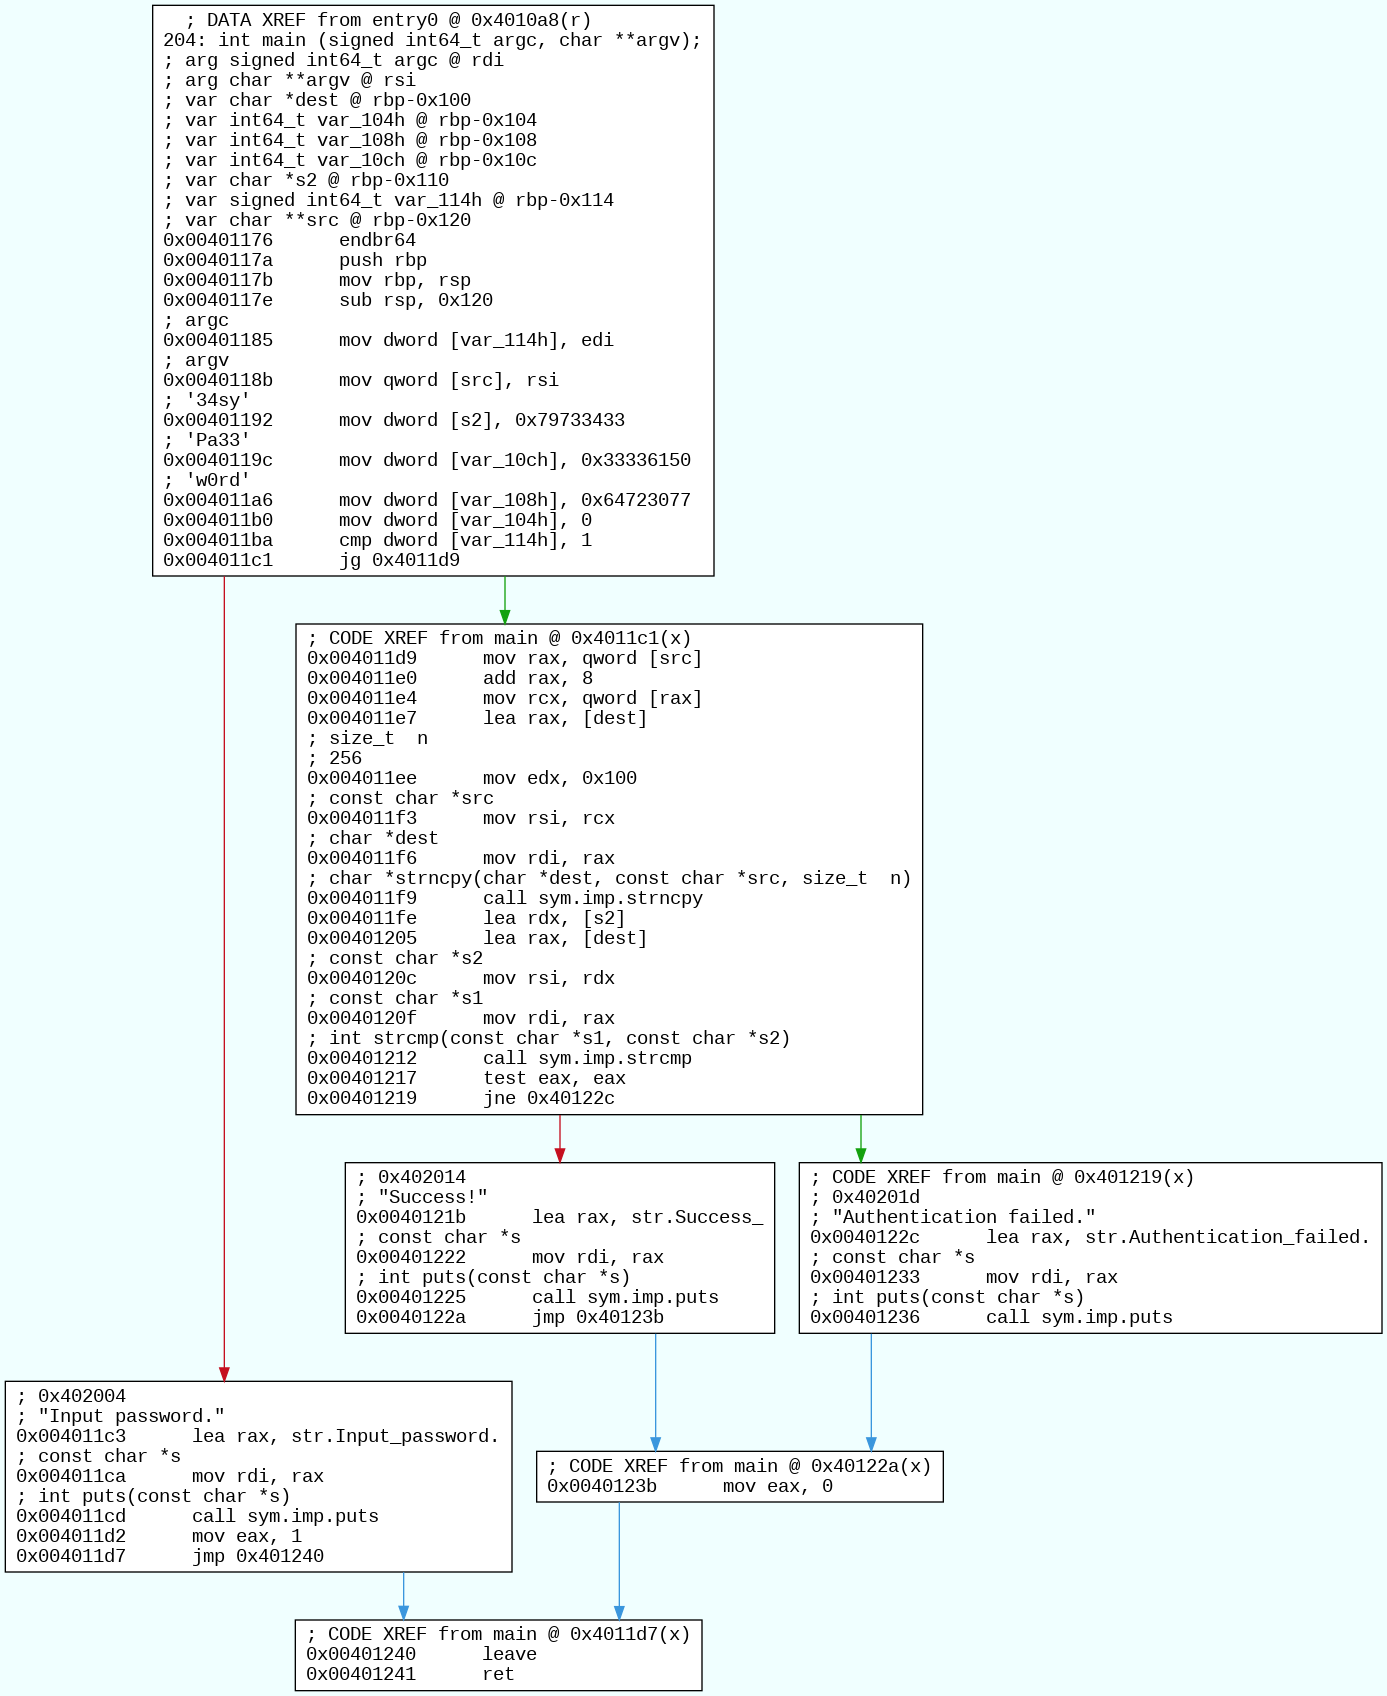

In [ ]:
import IPython

IPython.display.Image('a', format='png')

In [ ]:
!./prob7-1 34syPa33w0rd